<a href="https://colab.research.google.com/github/DanielDialektico/dialektico-machine-learning-practices/blob/main/notebooks/Preprocesamiento/Preprocesamiento_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://dialektico.com/wp-content/uploads/2023/03/MiniLogoW4.png" alt="Dialéktico Logo" />

#**ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO DE DATOS CON PYTHON** ⚒

---





# **Introducción**
El fin de esta práctica es darte un recorrido en el que observarás cómo se **analiza** y **preprocesa** un conjunto de datos con algunas librerías de **Python** (principalmente **Pandas**, la cual nos permite trabajar de forma sencilla con información dispuesta en tablas), con la pretensión de que experimentes las distintas etapas de edición por las que puede pasar un conjunto de datos antes de llegar a alimentar un modelo de **machine learning**.

Ejecutarás código que te ayude a **analizar**, **limpiar** y **transformar** un conjunto de datos para generar uno más comprensible y digerible para la máquina, y/o para quien lo manipule y utilicé con algún fin analítico.

<br>
<center><img src="https://dialektico.com/wp-content/uploads/2024/05/Prepro_Eq.jpg" width="300" /></center>




<br>

# **Objetivo**
Para esta práctica, se plantea el siguiente requerimiento:

*  Se nos ha dado la tarea de **analizar** un conjunto de datos de automóviles para hallar **insights** (descubrimientos relevantes), y posteriormente crear un modelo de **machine learning** que será utilizado por el área de marketing. Sin embargo, sabemos que antes debemos de ejecutar una etapa de **preprocesamiento** para llevar a cabo estas tareas de manera eficiente, lo cual, a su vez, implica un análisis exploratorio de datos.
*  Nuestro objetivo será la ejecución de esta etapa previa, realizando los cambios necesarios conforme a la información provista por el análisis.
*  El conjunto de datos a trabajar es una tabla con **256 ejemplos de entrenamiento**, los cuales contienen **26 características** de cada coche.
*  Para completar nuestra tarea, el equipo de marketing nos ha pedido que solo utilicemos los siguientes **atributos** (columnas): tipo de motor, número de cilindros, sistema de combustible, caballos de fuerza, y precio.

<br>
<center><img src="https://dialektico.com/wp-content/uploads/2024/10/PDD_Colab_png_2.png" alt="Dialéktico Logo" width="400" /></center>

**Nota**: el conjunto de datos que utilizaremos comprende **información real** de acceso público. Para más información, consúltese el **[apéndice](https://colab.research.google.com/drive/10O1A-C6nKCfaCrb1Vu8ayfDuBtIIzE_9#scrollTo=HaVTloDvHZTr)** al final de la lección.

<br>

# **Declaración de librerías y carga de datos**
En este caso, el conjunto de datos se descargará desde un repositorio en **[GitHub](https://github.com/DanielDialektico)**. Se trata de una sola tabla, por lo que no será necesario acudir a una etapa de **integración** del **preprocesamiento** de datos.

Para cargar el conjunto de datos a nuestro espacio de trabajo, se extraerá la información (alojada en formato CSV) utilizando la URL del archivo, y se almacenará en una **tabla** (dataFrame) utilizando la librería **Pandas**.

Antes que nada, se importarán las **librerías** a utilizar, lo cual encontrarás al principio de la siguiente celda de código.

<center><img src="https://dialektico.com/wp-content/uploads/2024/10/PPD_M6.jpg" alt="Dialéktico Logo" width="600" /></center>

<br>

Ejecuta la siguiente celda para cargar los datos y las librerías, y de ahora en adelante, haz lo mismo con todos los bloques conforme vayan apareciendo:

In [ ]:
# Se importan las librerías.
import pandas as pd
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Se define el tipo de formato de las gráficas a utilizar (se utilizarán más adelante).
plt.style.use('seaborn-v0_8-whitegrid')

# Se ignoran las alertas.
warnings.filterwarnings('ignore')

# Se carga el conjunto de datos desde GitHub
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/dialektico-machine-learning-practices/refs/heads/main/data/Autom%C3%B3viles.csv')

Comprobamos que la carga se haya realizado correctamente mostrando los primeros cinco renglones de la tabla:

In [ ]:
# Se especifica que se muestren todas las columnas de la tabla.
pd.set_option('display.max_columns', None)

# Se imprimen los primeros cinco renglones.
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<br>

# **Análisis inicial y limpieza de datos**
Ahora que hemos cargado nuestro conjunto de datos, realizaremos una exploración inicial de los datos, para lo cual visualizaremos las características generales del conjunto.

Primero, utilizaremos la funcion **[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)** de Pandas, que imprimirá la siguiente información:  

* **RangeIndex**: Número de renglones.
* **Data Columns**: Número de columnas y características de columnas:
    * **Column**: el nombre de cada columna.
    * **Non-Null Count**: el número de valores no nulos, los cuales son los datos válidos, es decir, datos no vacíos o que no generan algún conflicto de lectura.
    * **Dtype**: el tipo de datos en el que está categorizada cada columna.



Ejecuta la siguiente celda para visualizar esta información:

In [ ]:
# Se despliega la información general del conjunto de datos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3    fuel-type         205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

En esta lista nos podemos percatar de que tenemos **26 columnas y 205 renglones**, y de que en algunas columnas tenemos la presencia de **valores nulos**, ya que el conteo "non-null" no siempre es igual a 205.

El ejemplo más claro de esto es el de la columna "**normalized-losses**", la cual cuenta solo con 164 valores no nulos, indicando un total de 41 valores de este tipo presentes.


Con esta información, y las instrucciones dadas en el planteamiento del **objetivo**, podemos comenzar la primera etapa del **[preprocesamiento](https://dialektico.com/introduccion-preprocesamiento/)** de datos, la cual corresponde a la de **limpieza** de estos.

Dado lo que hemos mostrado hasta el momento, y lo que sabemos que será necesario analizar, estableceremos la siguiente **lista de tareas** a ejecutar:

*   Renombramiento de columnas.
*   Eliminación de columnas no solicitadas.
*   Remoción de valores nulos.
*   Búsqueda y eliminación de datos repetidos.
*   Búsqueda y eliminación de valores atípicos.

<br>

## **Eliminación y renombramiento de columnas**

Como se ha señalado antes, se nos ha solicitado utilizar solamente **6 atributos** de nuestro conjunto de datos (tipo de motor, número de cilindros, sistema de combustible, caballos de fuerza, y precio), por lo que nos enfocaremos en matener solo estas columnas.

Primero procederemos a identificar las columnas y cambiar sus nombres utilizando la función **[rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)** de Pandas; esto con el fin de tener nombres de variables en español para un análisis y visualización más **cómoda** y **consistente** (y porque el requerimiento ha sido abordado en este idioma):

In [ ]:
# Se renombran las columnas solicitadas en el requerimiento.
dataset = dataset.rename(columns = {'engine-type': 'Tipo_de_motor','num-of-cylinders': 'Número_de_cilindros', 'engine-size': 'Tamaño_del_motor',
                                    'fuel-system': 'Sistema_de_combustible', 'horsepower': 'Caballos_de_fuerza', 'price': 'Precio'})
# Se imprime el conjunto de datos.
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,Tipo_de_motor,Número_de_cilindros,Tamaño_del_motor,Sistema_de_combustible,bore,stroke,compression-ratio,Caballos_de_fuerza,peak-rpm,city-mpg,highway-mpg,Precio
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Ahora extraemos las columnas solicitadas:

In [ ]:
# Se mantienen solo las columnas con las características deseadas, y se imprime el resultado.
dataset = dataset.loc[:, ['Tipo_de_motor', 'Número_de_cilindros', 'Sistema_de_combustible', 'Tamaño_del_motor', 'Caballos_de_fuerza', 'Precio']]
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,dohc,four,mpfi,130,111.0,13495.0
1,dohc,four,mpfi,130,111.0,16500.0
2,ohcv,six,mpfi,152,154.0,16500.0
3,ohc,four,mpfi,109,102.0,13950.0
4,ohc,five,mpfi,136,115.0,17450.0
...,...,...,...,...,...,...
200,ohc,four,mpfi,141,114.0,16845.0
201,ohc,four,mpfi,141,160.0,19045.0
202,ohcv,six,mpfi,173,134.0,21485.0
203,ohc,six,idi,145,106.0,22470.0


<br>

## **Remoción de valores nulos (NaN)**

Habiendo manipulado los datos para la extracción y edición de algunas **columnas** del conjunto de datos, volvemos a imprimir el resumen de nuestra tabla, con el fin de observar los **datos nulos** remanentes:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tipo_de_motor           205 non-null    object 
 1   Número_de_cilindros     205 non-null    object 
 2   Sistema_de_combustible  205 non-null    object 
 3   Tamaño_del_motor        205 non-null    int64  
 4   Caballos_de_fuerza      203 non-null    float64
 5   Precio                  201 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


Como se observa en la salida de esta casilla, ya contamos con solo 6 columnas de entre las cuales 2 cuentan con **valores nulos**.

Existen varias formas de encarar la presencia de este tipo de datos, en nuestro caso, dado que son pocos (aproximadamente, el 3% del total de los datos), procederemos simplemente a eliminar los renglones que los contienen utilizando la función **[dropna() ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**:

In [ ]:
# Se eliminan los renglones con valores nulos, y se resetea el índice (primera columna con la numeración) para tener una enumeración correcta.
dataset = dataset.dropna().reset_index(drop = True)

# Se imprime el conjunto de datos.
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,dohc,four,mpfi,130,111.0,13495.0
1,dohc,four,mpfi,130,111.0,16500.0
2,ohcv,six,mpfi,152,154.0,16500.0
3,ohc,four,mpfi,109,102.0,13950.0
4,ohc,five,mpfi,136,115.0,17450.0
...,...,...,...,...,...,...
194,ohc,four,mpfi,141,114.0,16845.0
195,ohc,four,mpfi,141,160.0,19045.0
196,ohcv,six,mpfi,173,134.0,21485.0
197,ohc,six,idi,145,106.0,22470.0


Notarás que los renglones ahora son 199 (información debajo de la tabla), por lo tanto, se han eliminado 6, lo cual no representa un monto **considerable** de **ejemplos de entrenamiento**.


**Nota:** el tratamiento de valores nulos o valores faltantes es todo un tema a explorar, y para el cual se deben considerar distintos métodos y casos. Esto lo veremos en una lección futura.

<br>

## **Búsqueda y eliminación de datos duplicados**

La existencia de datos (renglones) duplicados suele ser recurrente en conjuntos de datos, por lo que debe ser rutinaria la comprobación de su existencia, y su posterior eliminación, la cual haremos a continuación utilizando la función **[drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)** de Pandas.

El siguiente bloque imprimirá el número de valores duplicados en todo el conjunto de datos:

In [ ]:
# Se imprime el número de datos duplicados.
print('El número de renglones duplicados en el conjunto de datos es: ' + str(len(dataset)-len(dataset.drop_duplicates())))

El número de renglones duplicados en el conjunto de datos es: 7


Al tratarse de pocos valores (aprox. el 3.5% del total), los eliminamos invocando la función indicada:

In [ ]:
# Se eliminan los renglones repetidos y se resetea el índice de nuevo.
dataset.drop_duplicates(inplace = True)
dataset = dataset.reset_index(drop = True)

# Se imprime el conjunto de datos.
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,dohc,four,mpfi,130,111.0,13495.0
1,dohc,four,mpfi,130,111.0,16500.0
2,ohcv,six,mpfi,152,154.0,16500.0
3,ohc,four,mpfi,109,102.0,13950.0
4,ohc,five,mpfi,136,115.0,17450.0
...,...,...,...,...,...,...
187,ohc,four,mpfi,141,114.0,16845.0
188,ohc,four,mpfi,141,160.0,19045.0
189,ohcv,six,mpfi,173,134.0,21485.0
190,ohc,six,idi,145,106.0,22470.0


<br>

## **Remoción de valores atípicos (outliers)**

El último paso a llevar a cabo en nuestra limpieza de datos es la **eliminación** de **datos atípicos**, para la cual existe todo un abanico de métodos, entre los cuales se incluyen incluso algoritmos de **[aprendizaje de máquinas](https://dialektico.com/introduccion-machine-learning/)**. En esta ocasión, en pos de la simplicidad, utilizaremos un método estadístico clásico llamado **rango intercuartílico**, el cuál es una técnica convencional que puede ser utilizada para la eliminación de datos atípicos en conjuntos con **distribuciones no gaussianas.**

 En exploraciones futuras, ahondaremos en la inusitada cantidad de métodos disponibles para abordar esta problemática.

Para una rápida ilustración de lo que representan los **valores atípicos**, graficaremos los datos de los caballos de fuerza de cada coche respecto a su precio, utilizando la librería **[Matplotlib](https://matplotlib.org/stable/index.html)**:

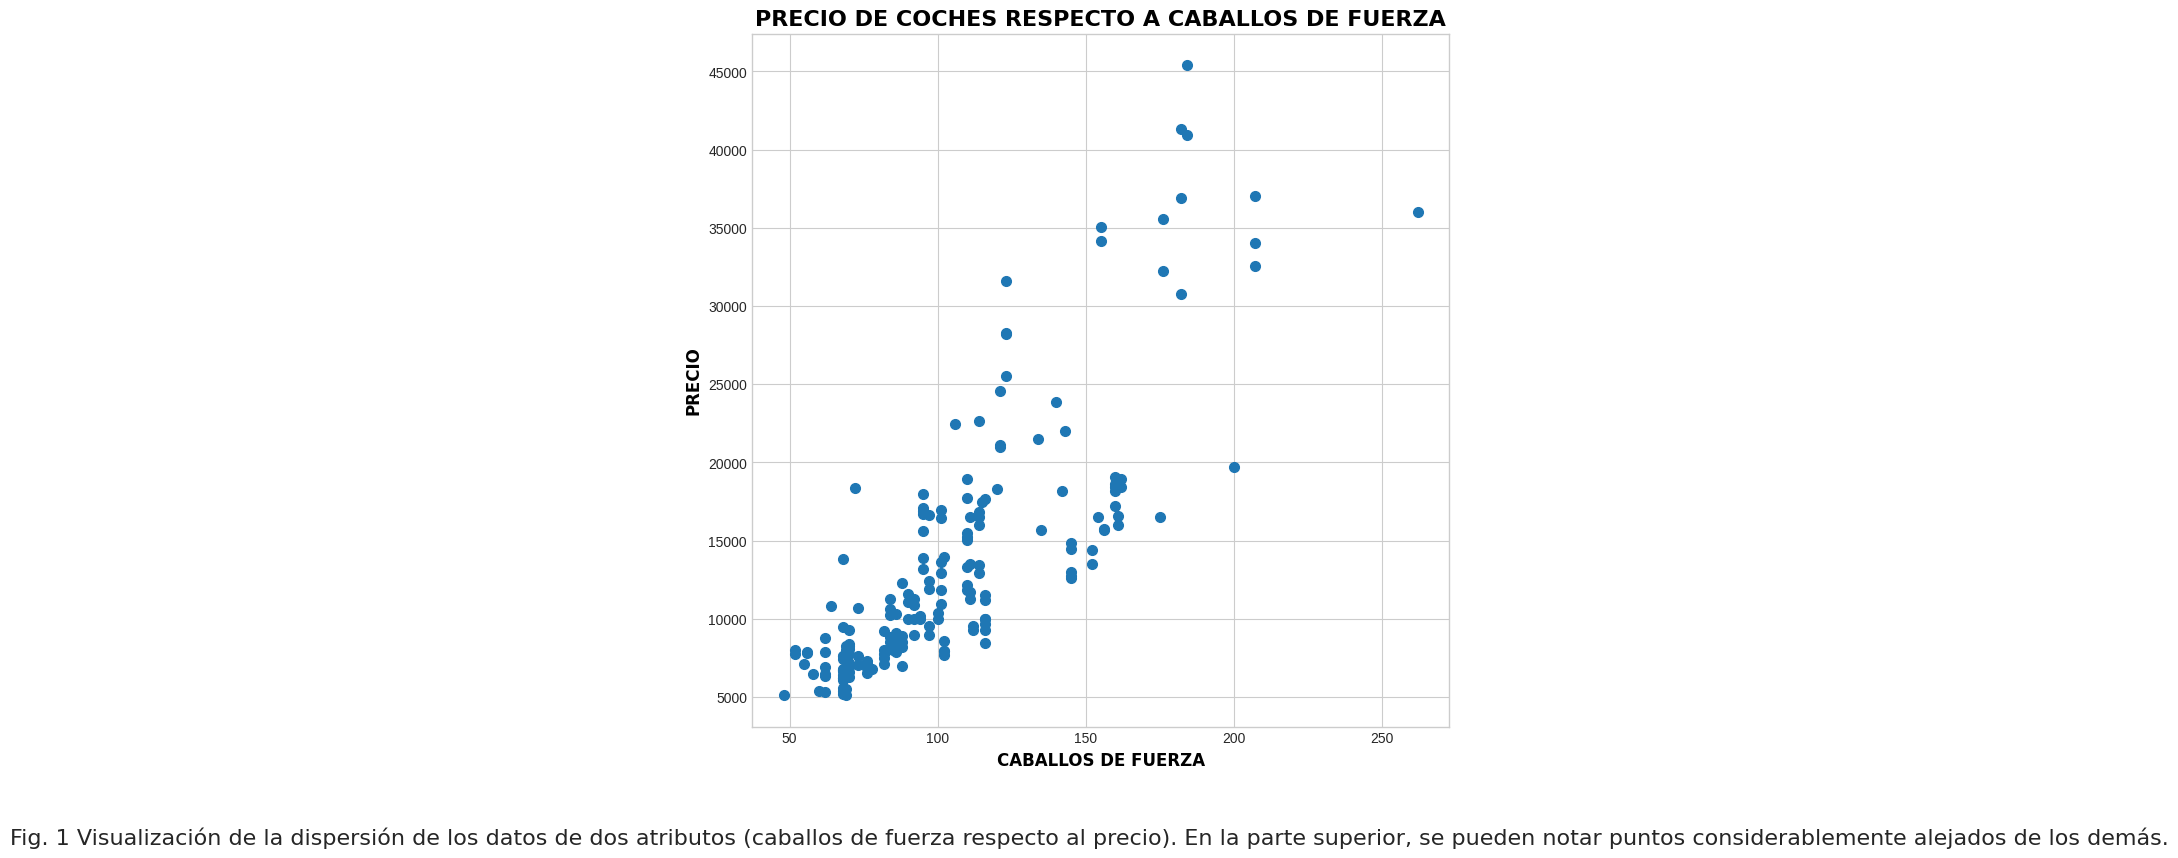

In [ ]:
# Se determinan los datos a graficar, en este caso: el precio y los caballos de fuerza de cada automóvil.
x_points = dataset['Caballos_de_fuerza']
y_points = dataset['Precio']

# Se grafican.
plt.figure(figsize=(9, 9))
plt.plot(x_points, y_points, 'o',  markersize = 7)
plt.title("PRECIO DE COCHES RESPECTO A CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 16})
plt.suptitle("Fig. 1 Visualización de la dispersión de los datos de dos atributos (caballos de fuerza respecto al precio). En la parte superior, se pueden notar puntos considerablemente alejados de los demás.",
             fontproperties = {'family': 'DejaVu Sans', 'size': 16}, y=-0.001)
plt.xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 12})
plt.ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 12})
plt.show()

En la **Figura 1** se observa cómo hay puntos que parecen alejarse demasiado de aquellos que están más agrupados; estos son los datos que procederemos a eliminar, ya que se consideran **anomalías** que pueden afectar la precisión de los modelos entrenados con esta información poco significativa.

Nótese cómo el uso de esta gráfica es parte del análisis exploratorio, más específicamente, de la etapa que implica **visualización de datos**.

A continuación, se eliminan los **valores atípico**s de la variable **Precio**, y se muestra la gráfica después de aplicar esta remoción. Como se señaló antes, la limpieza de estos se realizó con base en un análisis de **rango intercuartílico**, el cual no detallaremos por el momento, ya que el fin de esta práctica es la demostración de los resultados del preprocesamiento de datos:

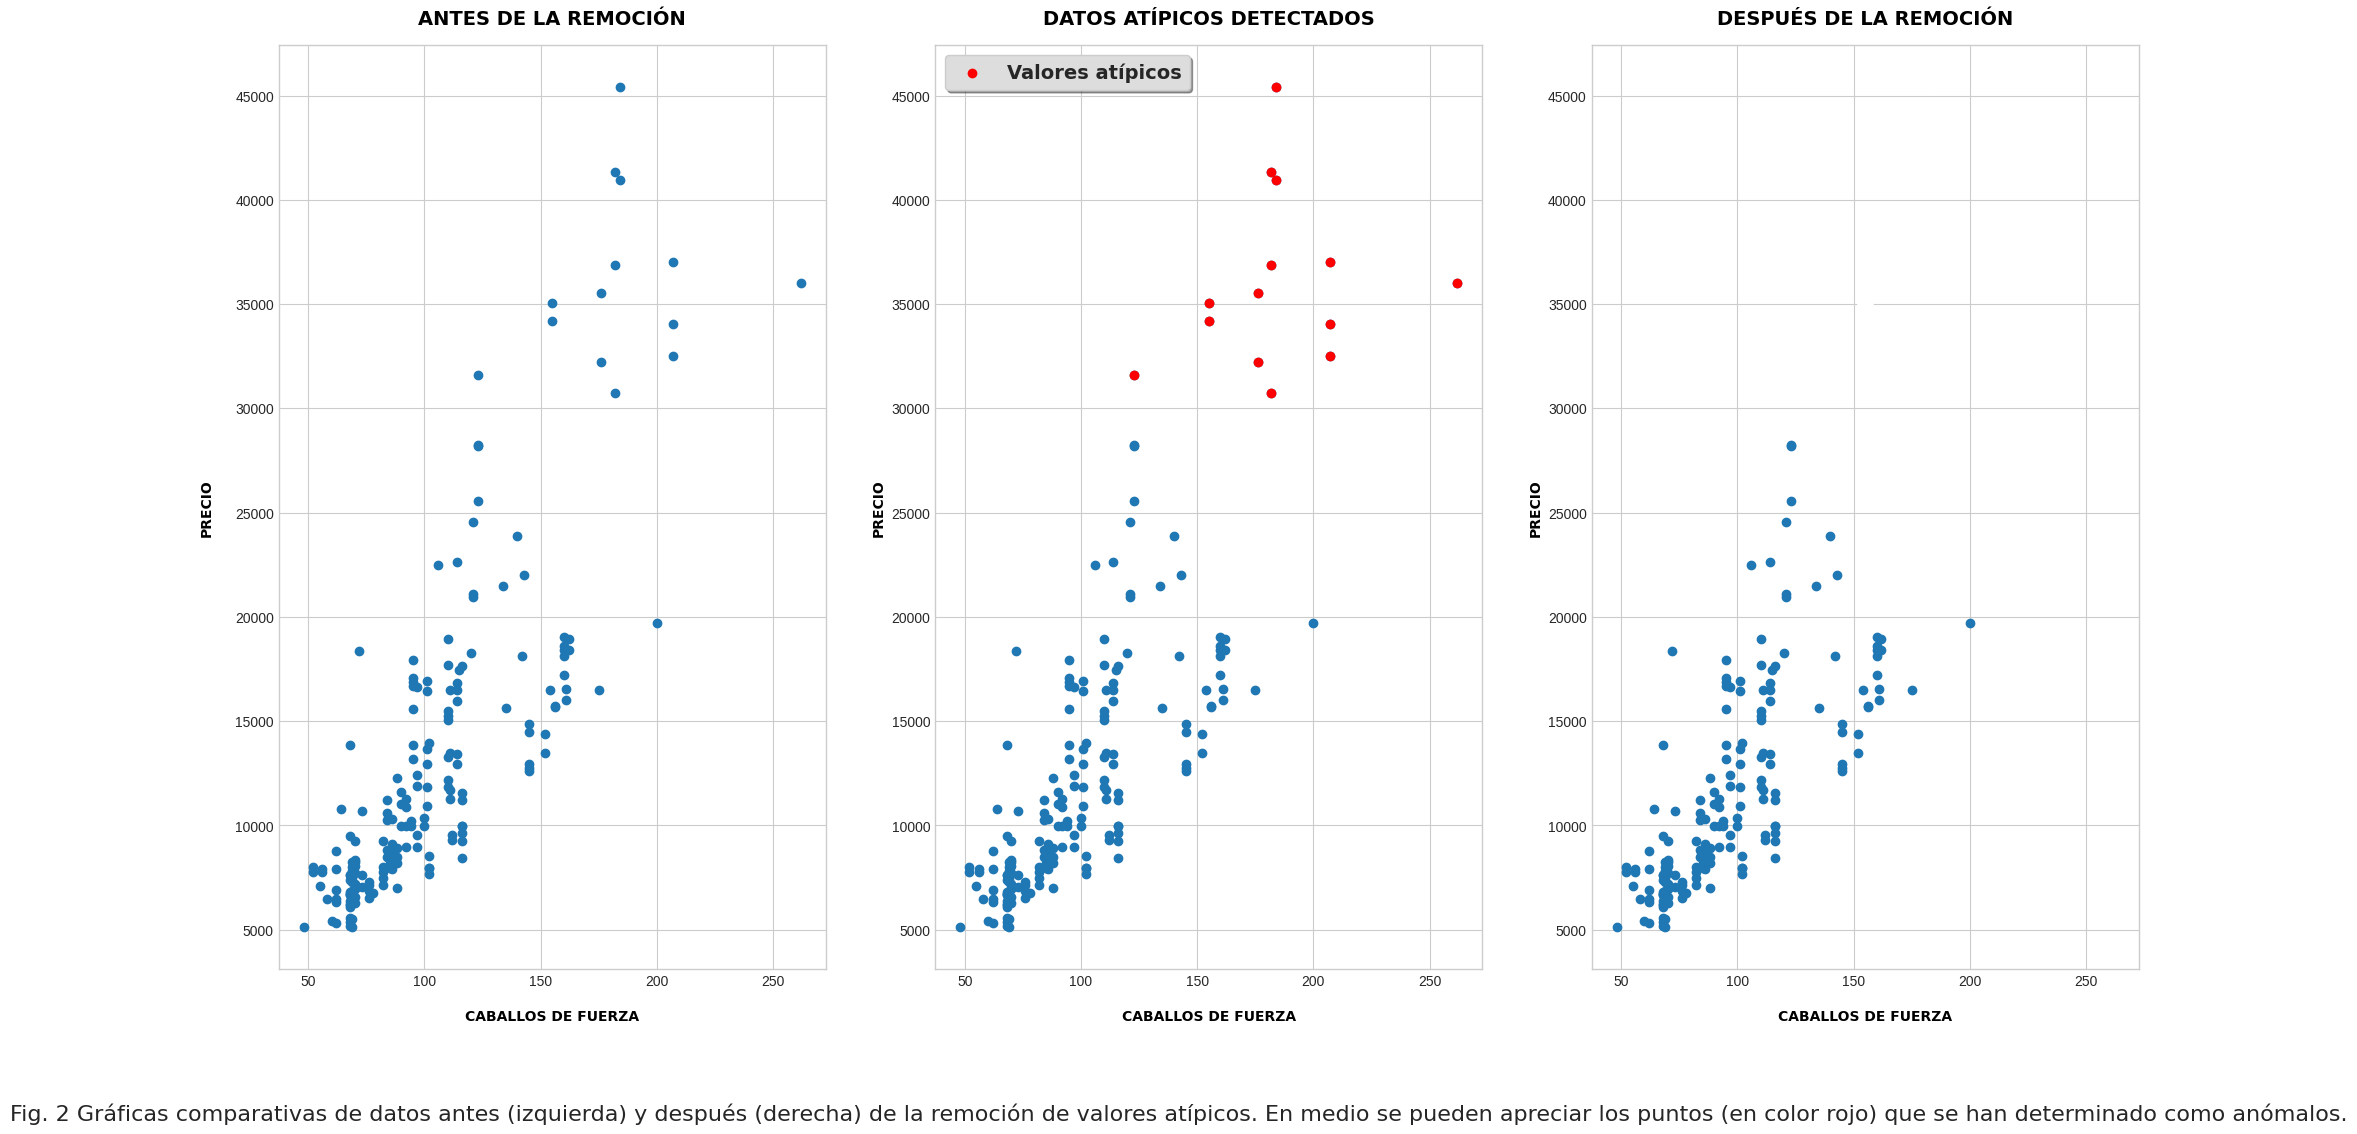

In [ ]:
# Se crea una función que calcula los límites superior e inferior del rango intercuartílico.
def iqr_filter(column):
  percentile25 = dataset[column].quantile(0.25)
  percentile75 = dataset[column].quantile(0.75)
  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  return upper_limit,lower_limit

# Se crea un conjunto de datos temporal para hacer las comparaciones.
temp_dataset = dataset

# Se realiza la detección y eliminación de los valores atípicos en los precios.
upper_p,lower_p = iqr_filter('Precio')
temp_dataset = temp_dataset[dataset['Precio'] > lower_p]
temp_dataset = temp_dataset[dataset['Precio'] < upper_p]

x_points = dataset['Caballos_de_fuerza'] # Puntos del conjunto de datos original
y_points = dataset['Precio']

t_xpoints = temp_dataset['Caballos_de_fuerza'] # Puntos del conjunto de datos temporal.
t_ypoints = temp_dataset['Precio']

# Se declaran un conjunto de datos con los outliers, para la ilustración de su detección y elminación.
out_dataset = pd.concat([dataset,temp_dataset]).drop_duplicates(keep=False)

o_xpoints = out_dataset['Caballos_de_fuerza'] # Puntos del conjunto de datos atípicos.
o_ypoints = out_dataset['Precio']

# Se despliegan las gráficas.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 12), sharex=True)

ax1.plot(x_points, y_points, 'o')
ax1.set_title("ANTES DE LA REMOCIÓN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
ax1.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)
ax1.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)

ax2.scatter(x_points, y_points)
ax2.scatter(o_xpoints, o_ypoints, c = 'red', label = 'Valores atípicos')
ax2.set_title("DATOS ATÍPICOS DETECTADOS", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
ax2.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)
ax2.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10})
ax2.legend(loc='upper left', prop = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 14}, frameon = True, framealpha = 1, facecolor  = '#dddddd', shadow = True)

ax3.scatter(x_points, y_points)
ax3.scatter(o_xpoints, o_ypoints, s= 120, c = 'white')
ax3.set_title("DESPUÉS DE LA REMOCIÓN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
ax3.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)
ax3.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10})

plt.suptitle("Fig. 2 Gráficas comparativas de datos antes (izquierda) y después (derecha) de la remoción de valores atípicos. En medio se pueden apreciar los puntos (en color rojo) que se han determinado como anómalos.",
             fontproperties = {'family': 'DejaVu Sans', 'size': 16}, y=-0.001)

plt.show()

En la **Figura 2** se ilustra cómo cambia la **dispersión** de los datos antes y después de la **eliminación** de las **observaciones atípicas**, dando como resultado (tercera gráfica) puntos más cercanos entre sí.

Habiendo vislumbrado el objetivo de esta técnica, se procede a hacer lo mismo para todas las columnas a excepción de aquellas cuyos valores no son **numéricos** (solo las primeras tres columnas):

In [ ]:
# Se ejecuta la eliminación de outliers con la función antes definida.
for i in dataset.columns[3:].tolist():
  upper_p,lower_p = iqr_filter(i)
  dataset = dataset.loc[dataset[i] > lower_p]
  dataset = dataset.loc[dataset[i] < upper_p]

# Se reinicia el índice y se imprime la tabla resultante.
dataset = dataset.reset_index(drop = True)
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,dohc,four,mpfi,130,111.0,13495.0
1,dohc,four,mpfi,130,111.0,16500.0
2,ohcv,six,mpfi,152,154.0,16500.0
3,ohc,four,mpfi,109,102.0,13950.0
4,ohc,five,mpfi,136,115.0,17450.0
...,...,...,...,...,...,...
170,ohc,four,mpfi,141,114.0,16845.0
171,ohc,four,mpfi,141,160.0,19045.0
172,ohcv,six,mpfi,173,134.0,21485.0
173,ohc,six,idi,145,106.0,22470.0


En esta última tabla se observa un total de **175 renglones**, por lo que el conjunto de datos fue limpiado a una versión más **estadísticamente** conveniente para nuestros fines.

**Nota**: el número de métodos para la detección de outliers es extenso, y varía en función de las características de cada conjunto de datos. Entre las librerías que se pueden emplear para estos fines se encuentran [PyOD](https://github.com/yzhao062/pyod), [Alibi Detect](https://github.com/SeldonIO/alibi-detect), y [PyNomaly](https://github.com/vc1492a/PyNomaly), de entre las cuales utilizaremos algunas a lo largo de las prácticas del curso.

<center><img src="https://dialektico.com/wp-content/uploads/2024/10/PPD_M7.jpg" alt="Dialéktico Logo" width="600" /></center>

<br>

<br>

# **Transformación**
Como ya se ha [definido](https://dialektico.com/introduccion-preprocesamiento/#transf), la **transformación** de los datos consiste en expresarlos en formas que posibiliten y/u optimicen su procesamiento computacional.

En esta etapa se llevarán a cabo las siguientes actividades:



*   Codificación de datos cualitativos a tipo cuantitativo.
*   Escalado de datos.

A continuación, se desglosan sus razones y métodos.

<br>

## **Codificación de datos cualitativos**

Para aclarar el por qué de este primer paso, revisemos cómo ha quedado la información de nuestro conjunto de datos después de la primera etapa de preprocesamiento:


In [ ]:
# Se despliega la información general del conjunto de datos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tipo_de_motor           175 non-null    object 
 1   Número_de_cilindros     175 non-null    object 
 2   Sistema_de_combustible  175 non-null    object 
 3   Tamaño_del_motor        175 non-null    int64  
 4   Caballos_de_fuerza      175 non-null    float64
 5   Precio                  175 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.3+ KB


Se puede notar que los **valores nulos** han desaparecido, además de haber disminuido el número de **atributos**, cambiado sus nombres, y reducido el número de ejemplos de entrenamiento.

Ahora dirijamos nuestra atención a la sección con el título "**Dtype**", la cual nos muestra el tipo de datos que contiene cada columna; en esta notaremos algunos valores de tipo **enteros** (int64) o **racionales** (float64), es decir, de tipo cuantitativo; sin embargo, también notaremos algunas columnas con valores **[cualitativos](https://dialektico.com/datos-machine-learning/#Dcualit)**, como la correspondiente al **tipo de motor**.

Dado que en nuestros **objetivos** se ha establecido que estos datos se utilizarán como **entradas** para un modelo de **aprendizaje automático**, los datos de todo el conjunto deberán ser de **tipo numérico**, por lo que procederemos a transformar todos los datos cualitativos en representaciones matemáticas de los mismos.



Para llevar a cabo esta transformación utilizaremos la librería **[Sklearn](https://scikit-learn.org/stable/index.html)** y su clase **[LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)**, la cual asignará un número entero a cada uno de los posibles valores de la columna.

**Nota:** utilizaremos esta técnica para mantener la sencillez de la experiencia del preprocesamiento, mas no significa que sea la mejor opción entre todo el espectro de posibilidades. La forma de generar representaciones numéricas para cada variable dependerá de factores asociados al modelo del cual serán entradas. Esto lo aprenderemos con detalle más adelante.

Observemos cómo se aplica esto a la característica "**Tipo_de_motor**".

Partiremos observando cuáles son los diferentes **valores** de este atributo:

In [ ]:
# Se imprimen los distintos valores de la columna Tipo_de_motor, y el número de veces que aparece cada uno.
dataset['Tipo_de_motor'].value_counts()

,count
Tipo_de_motor,
ohc,131
l,12
ohcf,12
dohc,10
ohcv,6
rotor,4


En la primer columna se observa el valor que puede tomar el **atributo**, y en la segunda columna el **número de veces** que aparece cada uno. Por ejemplo, hay 131 renglones o ejemplos de entrenamiento en los que aparece "ohc" como valor del **tipo de motor**.

Sabiendo que existen 6 posibles valores, procedemos a codificarlos numéricamente:

In [ ]:
# Se declara el codificador.
le = preprocessing.LabelEncoder()

# Se transforman los valores de la columna en enteros.
dataset['Tipo_de_motor'] = le.fit_transform(dataset['Tipo_de_motor'])

# Se imprime el conjunto de datos.
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,0,four,mpfi,130,111.0,13495.0
1,0,four,mpfi,130,111.0,16500.0
2,4,six,mpfi,152,154.0,16500.0
3,2,four,mpfi,109,102.0,13950.0
4,2,five,mpfi,136,115.0,17450.0
...,...,...,...,...,...,...
170,2,four,mpfi,141,114.0,16845.0
171,2,four,mpfi,141,160.0,19045.0
172,4,six,mpfi,173,134.0,21485.0
173,2,six,idi,145,106.0,22470.0


En la tabla se puede constatar que ahora los valores para la variable "Tipo_de_motor" son **numéricos**: enteros que se han asignado a cada posible dato cualitativo.

La transformación se dio de la siguiente forma:


*   **dohc** = 0
*   **l** = 1
*   **ohc** = 2
*   **ohcf** = 3
*   **ohcv** = 4
*   **rotor** = 5



Después de ver cómo se da esta transformación, procedemos a aplicar la misma a las demás columnas con datos de tipo cualitativo:

In [ ]:
# Se aplica el codificador a cada columna con valores no numéricos.
dataset['Número_de_cilindros'] = le.fit_transform(dataset['Número_de_cilindros'])
dataset['Sistema_de_combustible'] = le.fit_transform(dataset['Sistema_de_combustible'])

# Se imprime el conjunto de datos.
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,0,1,5,130,111.0,13495.0
1,0,1,5,130,111.0,16500.0
2,4,2,5,152,154.0,16500.0
3,2,1,5,109,102.0,13950.0
4,2,0,5,136,115.0,17450.0
...,...,...,...,...,...,...
170,2,1,5,141,114.0,16845.0
171,2,1,5,141,160.0,19045.0
172,4,2,5,173,134.0,21485.0
173,2,2,3,145,106.0,22470.0


El resultado es un conjunto de datos con todos los valores de tipo **numéricos**.

<br>

## **Escalado de datos y análisis descriptivo**

Ahora que tenemos valores completamente numéricos, procedemos a explorarlos de otra forma: realizando un breve análisis descriptivo desplegando algunas estadísticas básicas utilizando la función **describe()** de Pandas, la cual nos mostrará la siguiente información de los valores de cada columna:



*   **Count**: número de valores de cada columna.
*   **Mean**: su promedio.
*   **Std**: su desviación estándar.
*   **Min**: su valor mínimo.
*   **Max**: su valor máximo.
*   **25%, 50%, 75%**: sus percentiles


In [ ]:
# Desplegamos las estadísticas del conjunto de datos.
dataset.describe()

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2.022857,1.120000,3.148571,117.725714,96.640000,11418.822857
std,0.843871,0.579734,2.031557,25.673999,29.237663,4708.804425
min,0.000000,0.000000,0.000000,61.000000,48.000000,5118.000000
25%,2.000000,1.000000,1.000000,97.000000,70.000000,7713.500000
50%,2.000000,1.000000,3.000000,110.000000,92.000000,9988.000000
75%,2.000000,1.000000,5.000000,136.000000,114.000000,15145.000000
max,5.000000,4.000000,7.000000,183.000000,175.000000,25552.000000


En la tabla puedes observar los valores de cada estadística para cada atributo o columna existente.

Por el momento, nos centraremos en los valores de los rangos (mínimos y máximos). Sin contar los datos de aquellas variables que transformamos en el paso anterior, ya que sus valores son poco diversos y todos **discretos**, se pueden discernir cantidades **máximas** y **mínimas** muy distantes entre sí (en un rango de 48 a 25,552).

Dato que estos datos fungirán como **entradas** para un **algoritmo** de machine learning, lo recomendable es **escalar** los datos (hacer más pequeñas las distancias entre las observaciones colocándolos en un intervalo) para eficientar su **procesamiento**.

Para esto recurriremos a la clase **[MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)** de Sklearn, la cual escalará los datos a un intervalo de 0 a 1:

In [ ]:
# Se declara la clase que escalará nuestros datos.
scaler = preprocessing.MinMaxScaler()

# Se escalan los datos a un intervalo entre 0 y 1.
normalized = scaler.fit_transform(dataset)

# Se toman los valores de las columnas y se recrea la tabla con los datos escalados.
column_names = dataset.columns
dataset = pd.DataFrame(normalized, columns = column_names)

# Se imprime el conjunto de datos.
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,0.0,0.25,0.714286,0.565574,0.496063,0.409954
1,0.0,0.25,0.714286,0.565574,0.496063,0.557013
2,0.8,0.50,0.714286,0.745902,0.834646,0.557013
3,0.4,0.25,0.714286,0.393443,0.425197,0.432221
4,0.4,0.00,0.714286,0.614754,0.527559,0.603504
...,...,...,...,...,...,...
170,0.4,0.25,0.714286,0.655738,0.519685,0.573896
171,0.4,0.25,0.714286,0.655738,0.881890,0.681560
172,0.8,0.50,0.714286,0.918033,0.677165,0.800969
173,0.4,0.50,0.428571,0.688525,0.456693,0.849173


Como podrás notar, el resultado es el conjunto de datos con los números escalados entre los valores 0 y 1, lo cual minimiza las distancias y procura un mayor **rendimiento** de procesamiento.

<br>

# **Resultados**
Hemos terminado nuestro preprocesamiento. Ahora que se ha aplicado limpieza y transformación a nuestros datos, podemos visualizar el antes y el después de estas etapas:

**Conjunto de datos inicial:**

In [ ]:
orig_dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/dialektico-machine-learning-practices/refs/heads/main/data/Autom%C3%B3viles.csv')
orig_dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


**Conjunto de datos preprocesado:**

In [ ]:
dataset

,Tipo_de_motor,Número_de_cilindros,Sistema_de_combustible,Tamaño_del_motor,Caballos_de_fuerza,Precio
0,0.0,0.25,0.714286,0.565574,0.496063,0.409954
1,0.0,0.25,0.714286,0.565574,0.496063,0.557013
2,0.8,0.50,0.714286,0.745902,0.834646,0.557013
3,0.4,0.25,0.714286,0.393443,0.425197,0.432221
4,0.4,0.00,0.714286,0.614754,0.527559,0.603504
...,...,...,...,...,...,...
170,0.4,0.25,0.714286,0.655738,0.519685,0.573896
171,0.4,0.25,0.714286,0.655738,0.881890,0.681560
172,0.8,0.50,0.714286,0.918033,0.677165,0.800969
173,0.4,0.50,0.428571,0.688525,0.456693,0.849173


Notarás que el conjunto de datos cambió considerablemente en cuanto a su **estructura** y **contenido**, y aunque podrían hacerse más adecuaciones dependiendo del objetivo fijado, este ahora está más **optimizado** para alimentar un modelo de machine learning con los atributos solicitados.

Así concluye nuestra primera **práctica** en Python, el fin de este breve encuentro fue el de mostrar qué tipo de cambios se pueden llegar a necesitar suscitar en los datos para un eficiente procesamiento. Realizamos tareas de análisis descriptivo, inferencial, visualización de datos, y de limpieza y transformación. En esta ocasión, no fueron necesarias etapas de **reducción** o **integración**, pero no olvides que forma parte de las posibles técnicas del **preprocesamiento**.

No te preocupes por los detalles de todo lo que hicimos aquí, ha sido meramente demostrativo. El preprocesamiento de datos es una actividad práctamente inexorable en la creación de **modelos** de **aprendizaje de máquinas**, por lo que se irá practicando como una etapa inicial en la mayoría de los algoritmos abordados en el curso.

▶ [Regresar a la lección](https://dialektico.com/introduccion-preprocesamiento/#c%C3%B3digo) 🧙

<br>

# Apéndice

## Sobre el conjunto de datos
El conjunto de datos utilizado en este ejercicio fue obtenido del Repositorio de Aprendizaje de Máquinas UCI del Centro para Machine Learning e Inteligencia Artificial de la Universidad de California.

Estos datos fueron recolectados por Jeffrey C. Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu), de las siguientes fuentes:

*   1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
*   Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038.
*Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037.

**Atributos y sus rangos**:
1. **symboling**: -3, -2, -1, 0, 1, 2, 3.
2. **normalized-losses**: continuo de 65 a 256.
3. **make**:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. **fuel-type**: diesel, gasolina.
5. **aspiration**: std, turbo.
6. **num-of-doors**: cuatro, dos.
7. **body-style**:: techo duro, wagon, sedán, hatchback, descapotable.
8. **drive-wheels**: 4x4, fwd, rwd.
9. **engine-location**: delantero, trasero.
10. **wheel-base**: continua de 86.6 a 120.9.
11. **lenght**: continua de 141.1 a 208.1.
12. **width**: continua de 60.3 a 72.3.
13. **height**: continua de 47.8 a 59.8.
14. **curb-weigh**: continuo de 1488 a 4066.
15. **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. **num-of-cylinders**: ocho, cinco, cuatro, seis, tres, doce, dos.
17. **engine-size**: continuo de 61 a 326.
18. **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. **bore**: continuo de 2.54 a 3.94.
20. **stroke**: continua de 2.07 a 4.17.
21. **compression-ratio**: continua de 7 a 23.
22. **horsepower**: continua de 48 a 288.
23. **peak-rpm**: continua de 4.150 a 6.600 rpm.
24. **city-mpg**: continuo de 13 a 49.
25. **highway-mpg**: continuo de 16 a 54.

In [ ]:
# MIT License
#
# Copyright (c) 2023 Daniel García
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.